In [47]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from django.shortcuts import render
from django.http import JsonResponse
from keras.applications.imagenet_utils import decode_predictions

Load Model and Classify Image

In [48]:
# load model (vgg16)
model = tf.keras.applications.vgg16.VGG16(weights='imagenet')

In [49]:
def classify_image(image_path, model):
    response = {}
    
    model_image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224,224))
    model_image = np.expand_dims(model_image, axis=0)
    model_image = tf.keras.applications.imagenet_utils.preprocess_input(model_image)
    
    predictions = model.predict(model_image)
    label = decode_predictions(predictions)
    label = list(label)[0]
    response['name'] = str(label)
    return label

1/1 [==============================] - 0s 94ms/step


[('n02113712', 'miniature_poodle', 0.39795047),
 ('n02113799', 'standard_poodle', 0.37742501),
 ('n02113624', 'toy_poodle', 0.09290784),
 ('n02102318', 'cocker_spaniel', 0.049550608),
 ('n02099601', 'golden_retriever', 0.044574395)]

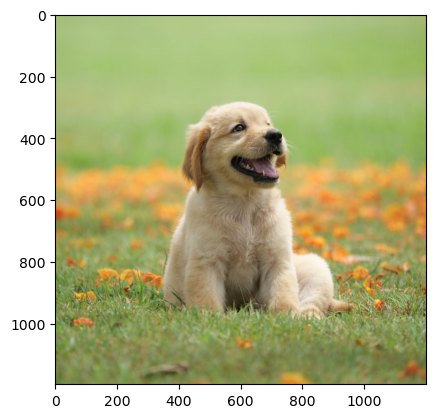

In [62]:
orig_image = plt.imread('test_images/dog.jpg')
plt.imshow(orig_image)
classify_image("test_images/dog.jpg", model)

Web Crawler with Keyword

In [67]:
import io
from pathlib import Path
import hashlib
import requests
import pandas as pd
from bs4 import BeautifulSoup
from PIL import Image
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time, urllib.request
import os

In [58]:
keyword = "test"
driver = webdriver.Chrome()
driver.get("https://www.instagram.com/explore/tags/" + keyword)
time.sleep(5)
img_results = driver.find_elements(By.XPATH, "//img[contains(@class, 'x5yr21d xu96u03 x10l6tqk x13vifvy x87ps6o xh8yej3')]")
src = []
for img in img_results:
    src.append(img.get_attribute('src'))
    if len(src) == 5:
        break

# downloads and returns list of 5 images searched by keyword
def search_by_keyword(keyword):
    driver = webdriver.Chrome()
    driver = webdriver.Chrome()
    driver.get("https://www.instagram.com/explore/tags/" + keyword)
    time.sleep(5)
    img_results = driver.find_elements(By.XPATH, "//img[contains(@class, 'x5yr21d xu96u03 x10l6tqk x13vifvy x87ps6o xh8yej3')]")
    src = []
    for img in img_results:
        src.append(img.get_attribute('src'))
        if len(src) == 5:
            break
    
    for i in range(len(src)):
        urllib.request.urlretrieve(str(src[i]), "sample_data/"+keyword+"{}.jpg".format(i))

1/1 [==============================] - 0s 89ms/step
[('n06359193', 'web_site', 0.9808255), ('n04404412', 'television', 0.0111784665), ('n04149813', 'scoreboard', 0.004656742), ('n03782006', 'monitor', 0.0009192336), ('n04152593', 'screen', 0.0004897929)]
1/1 [==============================] - 0s 88ms/step
[('n04285008', 'sports_car', 0.35536277), ('n04037443', 'racer', 0.22084914), ('n02930766', 'cab', 0.11140059), ('n03100240', 'convertible', 0.08615647), ('n02701002', 'ambulance', 0.04767119)]
1/1 [==============================] - 0s 92ms/step
[('n04285008', 'sports_car', 0.35643736), ('n03100240', 'convertible', 0.3171586), ('n04037443', 'racer', 0.26312062), ('n02814533', 'beach_wagon', 0.016529836), ('n02974003', 'car_wheel', 0.013833353)]
1/1 [==============================] - 0s 94ms/step
[('n02892767', 'brassiere', 0.3778146), ('n04525038', 'velvet', 0.04903938), ('n07248320', 'book_jacket', 0.041738223), ('n04235860', 'sleeping_bag', 0.039925862), ('n03877472', 'pajama', 0.03

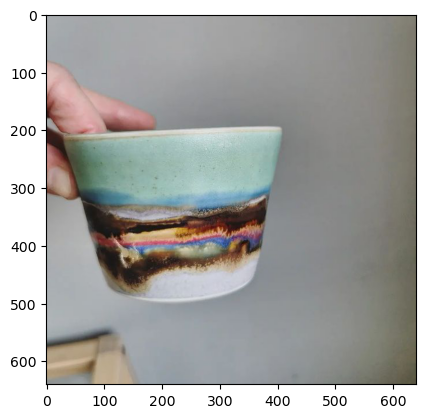

In [74]:
# performs classification on downloaded images
folder_dir = "sample_data/"
for images in os.listdir(folder_dir):
    if(images.endswith(".jpg")):
        orig_image = plt.imread(folder_dir + images)
        plt.imshow(orig_image)
        results = classify_image(folder_dir + images, model)
        print(results)